In [32]:
!pip install statsmodels

In [94]:
!pip install prophet

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

file_path = '/content/drive/MyDrive/Hamoye/household_power_consumption.txt'

df = pd.read_csv(file_path, sep=';')

df

<ipython-input-2-8618659bbd2b>:5: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep=';')


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [4]:
df.iloc[:, 2:] = df.iloc[:, 2:].apply(pd.to_numeric, errors='coerce')

<ipython-input-4-750fa4e41d06>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:, 2:] = df.iloc[:, 2:].apply(pd.to_numeric, errors='coerce')


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 142.5+ MB


In [6]:
df['Date'] = pd.to_datetime(df['Date'])

<ipython-input-6-b9c6864122be>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


In [7]:
df['Time'] = pd.to_datetime(df['Time'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   datetime64[ns]
 1   Time                   datetime64[ns]
 2   Global_active_power    float64       
 3   Global_reactive_power  float64       
 4   Voltage                float64       
 5   Global_intensity       float64       
 6   Sub_metering_1         float64       
 7   Sub_metering_2         float64       
 8   Sub_metering_3         float64       
dtypes: datetime64[ns](2), float64(7)
memory usage: 142.5 MB


In [9]:
df.isnull().sum()

Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [10]:
df_copy = df.copy()

In [11]:
df_copy_ffill = df_copy.fillna(method='ffill')
df_copy_ffill.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [53]:
correlation = df_copy_ffill['Global_active_power'].corr(df_copy_ffill['Voltage'])

# Print or use the correlation value as needed
print(f"Correlation between 'Global_active_power' and 'Voltage': {correlation}")

Correlation between 'Global_active_power' and 'Voltage': -0.39564658423499544


In [55]:
correlation = df_copy_ffill['Global_intensity'].corr(df_copy_ffill['Voltage'])

# Print or use the correlation value as needed
print(f"Correlation between 'Global_intensity' and 'Voltage': {correlation}")

Correlation between 'Global_intensity' and 'Voltage': -0.40745369921886454


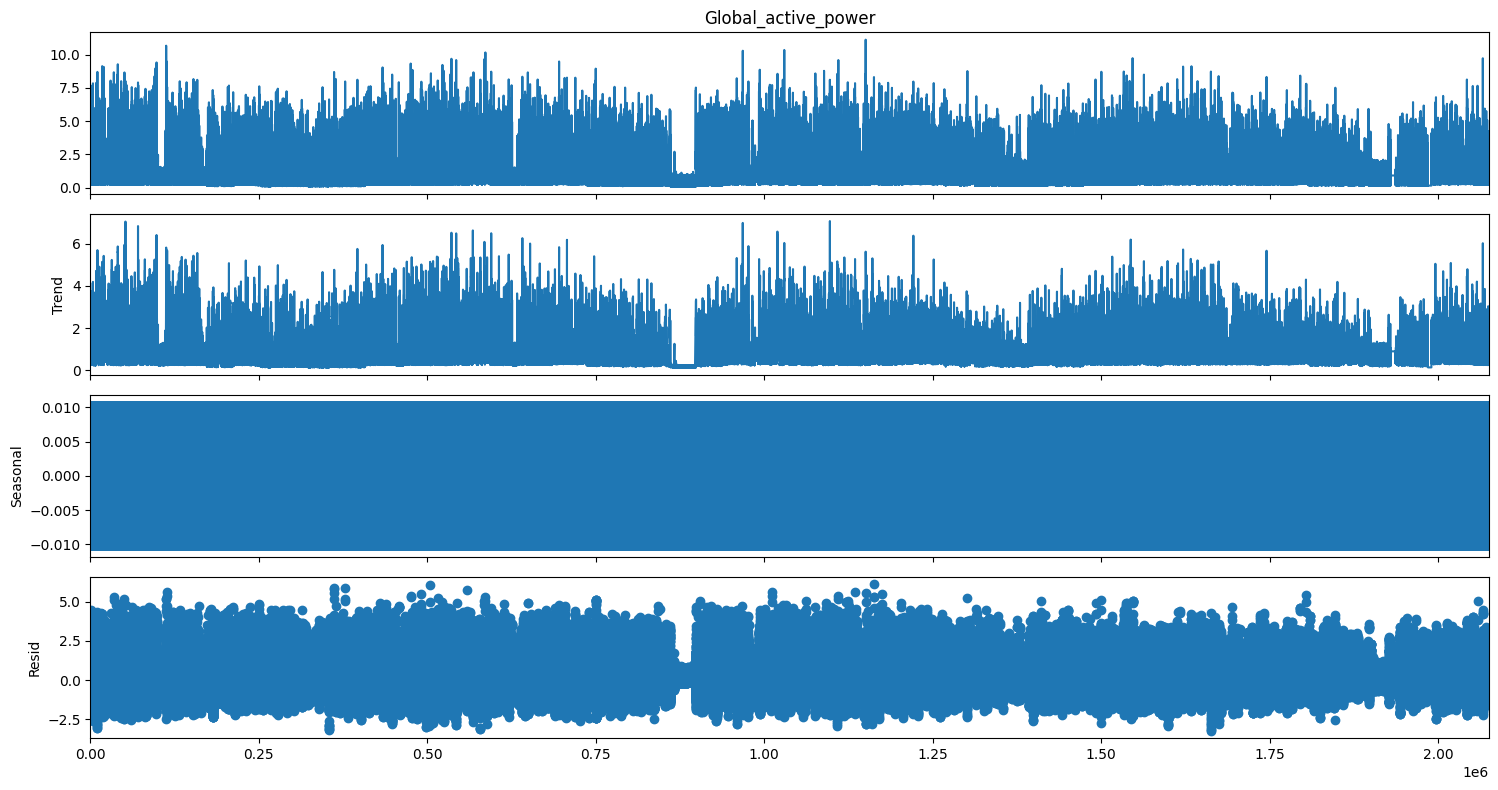

In [54]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8
decompose_series = sm.tsa.seasonal_decompose(df_copy_ffill['Global_active_power'], model='additive', period=60)
decompose_series.plot()
plt.show()

In [12]:
downsample = df[['Date',
                 'Time',
                 'Global_active_power',
                 'Global_reactive_power',
                 'Voltage',
                 'Global_intensity',
                 'Sub_metering_1',
                 'Sub_metering_2',
                 'Sub_metering_3'
                ]].resample('D', on='Date').agg({'Time': 'first','Global_active_power': 'sum', 'Global_reactive_power': 'sum', 'Voltage': 'sum', 'Global_intensity': 'sum', 'Sub_metering_1': 'sum', 'Sub_metering_2': 'sum', 'Sub_metering_3': 'sum'}).reset_index(drop=False)

df1= downsample.copy()
df1

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,2023-12-05 17:24:00,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
1,2006-12-17,2023-12-05 00:00:00,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2,2006-12-18,2023-12-05 00:00:00,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
3,2006-12-19,2023-12-05 00:00:00,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
4,2006-12-20,2023-12-05 00:00:00,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0
...,...,...,...,...,...,...,...,...,...
1452,2010-12-07,2023-12-05 00:00:00,1109.574,285.912,345914.85,4892.0,1724.0,646.0,6444.0
1453,2010-12-08,2023-12-05 00:00:00,529.698,169.098,346744.70,2338.2,0.0,514.0,3982.0
1454,2010-12-09,2023-12-05 00:00:00,1612.092,201.358,347932.40,6848.2,1805.0,2080.0,8891.0
1455,2010-12-10,2023-12-05 00:00:00,1579.692,170.268,345975.37,6741.2,1104.0,780.0,9812.0


In [13]:
import statsmodels.api as sm
from pylab import rcParams
import numpy as np
import matplotlib.pyplot as plt

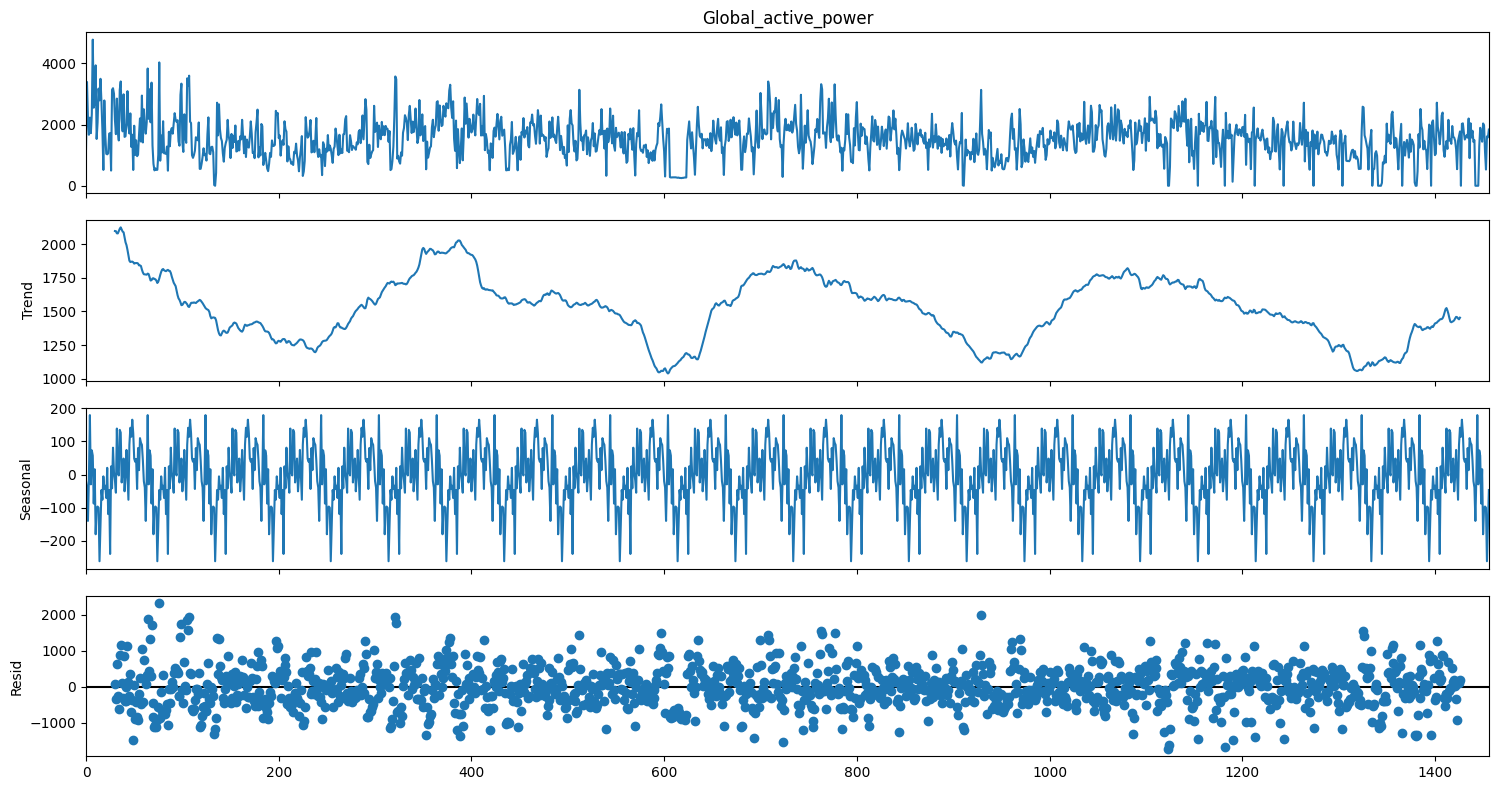

In [51]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8
decompose_series = sm.tsa.seasonal_decompose(df1['Global_active_power'], model='additive', period=60)
decompose_series.plot()
plt.show()



In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1457 entries, 0 to 1456
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   1457 non-null   datetime64[ns]
 1   Time                   1442 non-null   datetime64[ns]
 2   Global_active_power    1457 non-null   float64       
 3   Global_reactive_power  1457 non-null   float64       
 4   Voltage                1457 non-null   float64       
 5   Global_intensity       1457 non-null   float64       
 6   Sub_metering_1         1457 non-null   float64       
 7   Sub_metering_2         1457 non-null   float64       
 8   Sub_metering_3         1457 non-null   float64       
dtypes: datetime64[ns](2), float64(7)
memory usage: 102.6 KB


In [20]:
df_MA = df1.copy()
MA = df_MA['Global_active_power'].rolling(12).mean()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   datetime64[ns]
 1   Time                   datetime64[ns]
 2   Global_active_power    float64       
 3   Global_reactive_power  float64       
 4   Voltage                float64       
 5   Global_intensity       float64       
 6   Sub_metering_1         float64       
 7   Sub_metering_2         float64       
 8   Sub_metering_3         float64       
dtypes: datetime64[ns](2), float64(7)
memory usage: 142.5 MB


In [22]:
#The decomposed time series show an obvious increasing trend and seasonality variations. Recall that we have initially plotted the moving average on the last 12 months which showed that it varies with time. This suggests that the data is not stationary. We will now perform an ADF test to confirm this speculation

from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df1['Global_active_power'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')
for k, v in adf_result[4].items():
    print(f'   {k}: {v}')

ADF Statistic: -9.424498675226014
p-value: 5.392006124044142e-16
No. of lags used: 7
No. of observations used : 1449
Critical Values:
   1%: -3.4348709954268384
   5%: -2.863536715724964
   10%: -2.567833035595811


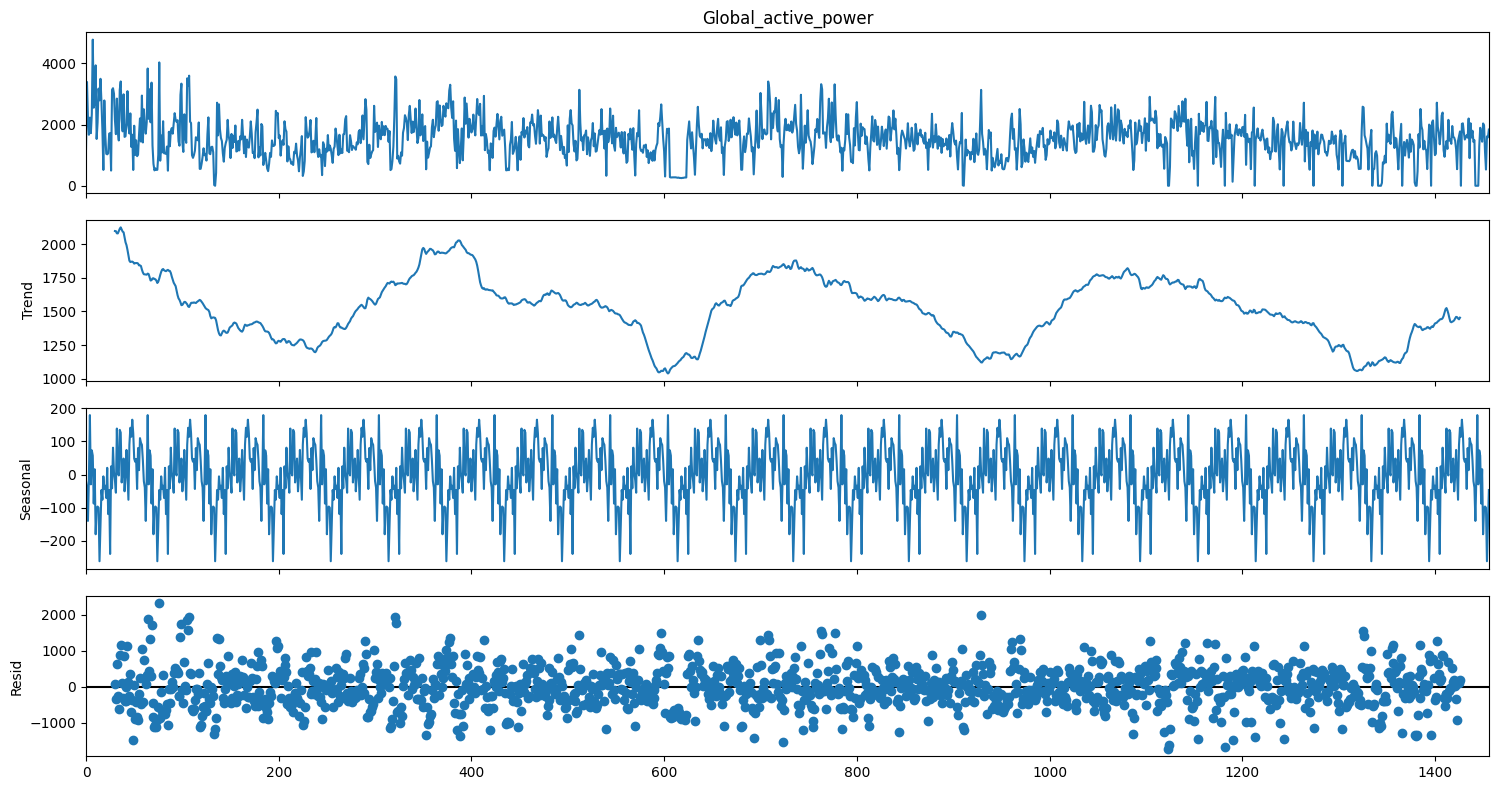

In [52]:
rcParams['figure.figsize'] = 15, 8
decompose_series = sm.tsa.seasonal_decompose(df1['Global_active_power'], model='additive', period=60)
decompose_series.plot()
plt.show()

In [27]:
import prophet

In [28]:
from prophet import Prophet

In [29]:
df_daily_uni = df1[["Date", "Global_active_power"]]
df_daily_uni

,Date,Global_active_power
0,2006-12-16,1209.176
1,2006-12-17,3390.460
2,2006-12-18,2203.826
3,2006-12-19,1666.194
4,2006-12-20,2225.748
...,...,...
1452,2010-12-07,1109.574
1453,2010-12-08,529.698
1454,2010-12-09,1612.092
1455,2010-12-10,1579.692


In [30]:
df_daily_uni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1457 entries, 0 to 1456
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 1457 non-null   datetime64[ns]
 1   Global_active_power  1457 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 22.9 KB


In [32]:
 df_daily_uni.rename(columns={'Date': 'ds', 'Global_active_power': 'y'}, inplace=True)
 df_daily_uni

<ipython-input-32-0468c8c5d521>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_daily_uni.rename(columns={'Date': 'ds', 'Global_active_power': 'y'}, inplace=True)


,ds,y
0,2006-12-16,1209.176
1,2006-12-17,3390.460
2,2006-12-18,2203.826
3,2006-12-19,1666.194
4,2006-12-20,2225.748
...,...,...
1452,2010-12-07,1109.574
1453,2010-12-08,529.698
1454,2010-12-09,1612.092
1455,2010-12-10,1579.692


In [33]:
df_daily_uni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1457 entries, 0 to 1456
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1457 non-null   datetime64[ns]
 1   y       1457 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 22.9 KB


In [34]:
df_daily_uni

,ds,y
0,2006-12-16,1209.176
1,2006-12-17,3390.460
2,2006-12-18,2203.826
3,2006-12-19,1666.194
4,2006-12-20,2225.748
...,...,...
1452,2010-12-07,1109.574
1453,2010-12-08,529.698
1454,2010-12-09,1612.092
1455,2010-12-10,1579.692


In [37]:
split_index = len(df_daily_uni) - 300

train_uni= df_daily_uni.iloc[:split_index]
test_uni= df_daily_uni.iloc[split_index:]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsnyhyqh6/3b56rx5n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsnyhyqh6/rv95u4j5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5088', 'data', 'file=/tmp/tmpsnyhyqh6/3b56rx5n.json', 'init=/tmp/tmpsnyhyqh6/rv95u4j5.json', 'output', 'file=/tmp/tmpsnyhyqh6/prophet_modelelx5dq2i/prophet_model-20231205222944.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:29:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:29:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


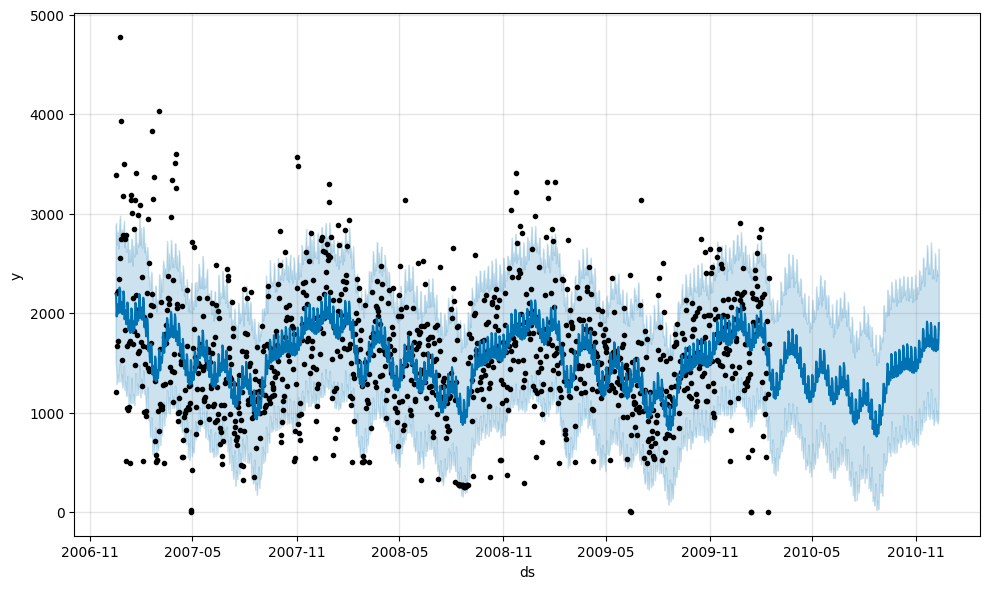

In [56]:
model = Prophet()
model.fit(train_uni)

#predict for the next 300 days
future = model.make_future_dataframe(periods=len(test_uni), freq='D')
forecast_uni = model.predict(future)
forecast_uni.head()
forecast_uni[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]
#yhat is the prediction while yhat_lower and yhat_upper are the upper and lower boundaries


model.plot(forecast_uni)
plt.show()

In [58]:
from sklearn.metrics import mean_absolute_error

y_pred = forecast_uni.tail(len(test_uni))['yhat'].values

y_true = test_uni['y'].values

mape = mean_absolute_error(y_true, y_pred) / abs(y_true).mean() * 100

print(f"MAPE: {mape:.2f}%")

MAPE: 31.27%


In [62]:
from sklearn.metrics import mean_squared_error
import math
mse = mean_squared_error(y_true, y_pred)
rmse = math.sqrt(mse)
print(rmse)

597.057005529471


In [39]:
forecast_uni.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1452,2010-12-07,1419.855497,1022.157586,2431.034858,1419.745794,1419.956907,308.801148,308.801148,308.801148,7.714818,7.714818,7.714818,301.086330,301.086330,301.086330,0.0,0.0,0.0,1728.656645
1453,2010-12-08,1419.697202,969.153794,2403.832372,1419.586783,1419.798705,272.070077,272.070077,272.070077,-33.748523,-33.748523,-33.748523,305.818600,305.818600,305.818600,0.0,0.0,0.0,1691.767279
1454,2010-12-09,1419.538907,840.288722,2362.890500,1419.427778,1419.640492,210.500727,210.500727,210.500727,-101.807731,-101.807731,-101.807731,312.308458,312.308458,312.308458,0.0,0.0,0.0,1630.039634
1455,2010-12-10,1419.380611,1000.797189,2481.391741,1419.268774,1419.482277,283.526606,283.526606,283.526606,-36.936648,-36.936648,-36.936648,320.463254,320.463254,320.463254,0.0,0.0,0.0,1702.907217
1456,2010-12-11,1419.222316,1150.292752,2605.427661,1419.109769,1419.324063,479.432074,479.432074,479.432074,149.300168,149.300168,149.300168,330.131906,330.131906,330.131906,0.0,0.0,0.0,1898.654390


In [41]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1457 entries, 0 to 1456
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   1457 non-null   datetime64[ns]
 1   Time                   1442 non-null   datetime64[ns]
 2   Global_active_power    1457 non-null   float64       
 3   Global_reactive_power  1457 non-null   float64       
 4   Voltage                1457 non-null   float64       
 5   Global_intensity       1457 non-null   float64       
 6   Sub_metering_1         1457 non-null   float64       
 7   Sub_metering_2         1457 non-null   float64       
 8   Sub_metering_3         1457 non-null   float64       
dtypes: datetime64[ns](2), float64(7)
memory usage: 102.6 KB


In [42]:
df_multi = df1.copy()

In [43]:
 df_multi.rename(columns={'Date': 'ds', 'Global_active_power': 'y','Global_reactive_power': 'add1','Voltage': 'add2','Global_intensity': 'add3','Sub_metering_1': 'add4','Sub_metering_2': 'add5','Sub_metering_3': 'add6'}, inplace=True)
 df_multi

,ds,Time,y,add1,add2,add3,add4,add5,add6
0,2006-12-16,2023-12-05 17:24:00,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
1,2006-12-17,2023-12-05 00:00:00,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2,2006-12-18,2023-12-05 00:00:00,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
3,2006-12-19,2023-12-05 00:00:00,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
4,2006-12-20,2023-12-05 00:00:00,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0
...,...,...,...,...,...,...,...,...,...
1452,2010-12-07,2023-12-05 00:00:00,1109.574,285.912,345914.85,4892.0,1724.0,646.0,6444.0
1453,2010-12-08,2023-12-05 00:00:00,529.698,169.098,346744.70,2338.2,0.0,514.0,3982.0
1454,2010-12-09,2023-12-05 00:00:00,1612.092,201.358,347932.40,6848.2,1805.0,2080.0,8891.0
1455,2010-12-10,2023-12-05 00:00:00,1579.692,170.268,345975.37,6741.2,1104.0,780.0,9812.0


In [44]:
df_multi.drop("Time",axis=1, inplace=True)
df_multi

,ds,y,add1,add2,add3,add4,add5,add6
0,2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
1,2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2,2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
3,2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
4,2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0
...,...,...,...,...,...,...,...,...
1452,2010-12-07,1109.574,285.912,345914.85,4892.0,1724.0,646.0,6444.0
1453,2010-12-08,529.698,169.098,346744.70,2338.2,0.0,514.0,3982.0
1454,2010-12-09,1612.092,201.358,347932.40,6848.2,1805.0,2080.0,8891.0
1455,2010-12-10,1579.692,170.268,345975.37,6741.2,1104.0,780.0,9812.0


In [69]:
split_index = len(df1) - 300

train_multi= df_multi.iloc[:split_index]
test_multi= df_multi.iloc[split_index:]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsnyhyqh6/t4tozeee.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsnyhyqh6/j5c49bmy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40419', 'data', 'file=/tmp/tmpsnyhyqh6/t4tozeee.json', 'init=/tmp/tmpsnyhyqh6/j5c49bmy.json', 'output', 'file=/tmp/tmpsnyhyqh6/prophet_modelyqsbto6w/prophet_model-20231205223513.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:35:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:35:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


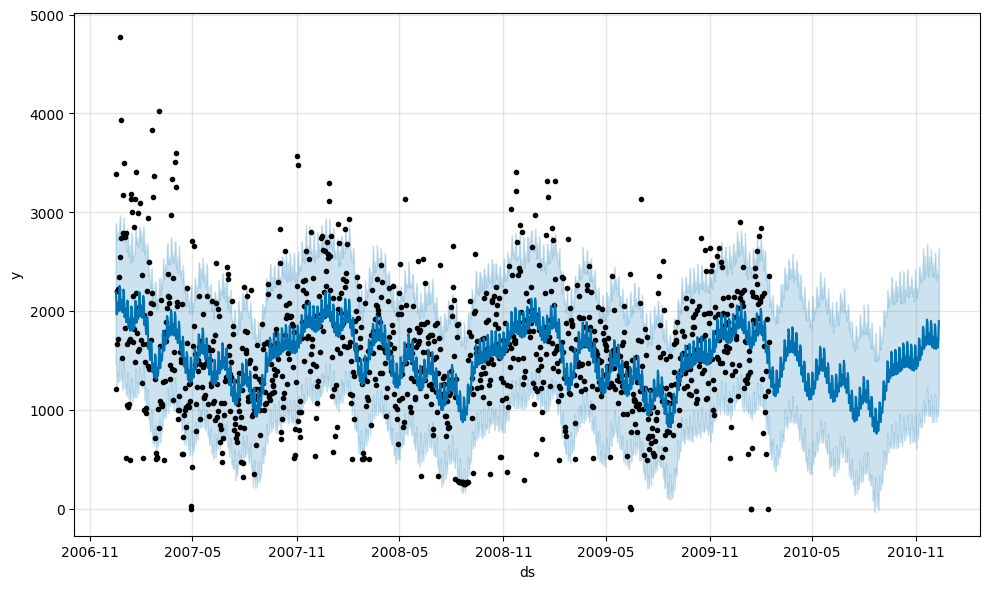

In [70]:
model = Prophet()
model.fit(train_multi)

future = model.make_future_dataframe(len(test_multi))
forecast_multi = model.predict(future)
forecast_multi.head()
forecast_multi[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]
#yhat is the prediction while yhat_lower and yhat_upper are the upper and lower boundaries


model.plot(forecast_multi)
plt.show()

In [71]:
from sklearn.metrics import mean_absolute_error

y_pred = forecast_multi.tail(len(test_multi))['yhat'].values

y_true = test_multi['y'].values

mape = mean_absolute_error(y_true, y_pred) / abs(y_true).mean() * 100

print(f"MAPE: {mape:.2f}%")

MAPE: 31.27%


In [49]:
forecast_multi.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1452,2010-12-07,1419.855497,1064.670281,2482.375101,1419.756030,1419.949581,308.801148,308.801148,308.801148,7.714818,7.714818,7.714818,301.086330,301.086330,301.086330,0.0,0.0,0.0,1728.656645
1453,2010-12-08,1419.697202,977.591968,2513.476693,1419.597259,1419.791336,272.070077,272.070077,272.070077,-33.748523,-33.748523,-33.748523,305.818600,305.818600,305.818600,0.0,0.0,0.0,1691.767279
1454,2010-12-09,1419.538907,918.447335,2315.912447,1419.438558,1419.633091,210.500727,210.500727,210.500727,-101.807731,-101.807731,-101.807731,312.308458,312.308458,312.308458,0.0,0.0,0.0,1630.039634
1455,2010-12-10,1419.380611,1001.711737,2402.667279,1419.279975,1419.474846,283.526606,283.526606,283.526606,-36.936648,-36.936648,-36.936648,320.463254,320.463254,320.463254,0.0,0.0,0.0,1702.907217
1456,2010-12-11,1419.222316,1187.674333,2676.347531,1419.121438,1419.316601,479.432074,479.432074,479.432074,149.300168,149.300168,149.300168,330.131906,330.131906,330.131906,0.0,0.0,0.0,1898.654390
